In [52]:
from __future__ import division
from math import *
import numpy as np
import scipy as sp
from scipy import stats, linalg
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Finches.csv')

# sample mean and std
xbar = np.mean(df.iloc[:,0])
s = np.std(df.iloc[:,0])
n = df.shape[0]

# population mean
mu0 = 6.07

# t-stat
dof = n-1
t_stat = (xbar-mu0)/(s/sqrt(n))
pval = stats.t.sf(t_stat, dof)
pval

1.3199339211190373e-78

In [13]:
alpha = 0.1 # p-value
t_crit = stats.t.ppf(1-alpha, 25)
pval = 1 - stats.t.cdf(t_crit, 25)
print(round(pval,2))

print(stats.t.sf(1.6,20)+stats.t.sf(-1.6,20))

0.1
1.0


In [28]:
# The average rent in LA is $1830. A real estate company want to examine
# if their rental prices are significantly different than the average 
# with alpha=0.05, by using a sample of size n units with mean of 
# mu and sample standard deviation of s.

pop_mu = 1830
mu = 1700
s = 200
n = 25

# one sample t-test
# find t critical value for two tailed test at alpha = 0.05
alpha = 0.05
t_crit = stats.t.ppf(1-alpha/2, n-1)
se = s/sqrt(n)
t_stat = (mu-pop_mu)/(se)
one_tail_pval = 1 - stats.t.cdf(abs(t_stat), n-1) # one tail pval

pval = 2*one_tail_pval
print(t_crit, t_stat, pval)

# %95 confidence interval, not related to t-stat, only data and 
# significant level
print(mu-t_crit*(se) , mu+t_crit*(se))

# margin of error
print(t_crit*(se))

# as n increases error decreases for 2 reasons, one is the increase of 
# dof which makes the t-dist skinnier, another is the decrease of 
# standard error.

2.0638985616280205 -3.25 0.0034019694897431396
1617.4440575348792 1782.5559424651208
82.55594246512082


In [20]:
print(stats.norm.ppf(1-0.05/2), stats.t.ppf(1-0.05/2, 24))
print(stats.norm.ppf(1-0.05/2), stats.t.ppf(1-0.05/2, 1000000)) # as n increases, close to normal

1.959963984540054 2.0638985616280205
1.959963984540054 1.9599663568141066


In [24]:
print(1 - stats.norm.cdf(2), 1 - stats.t.cdf(2, 24))
# t distro has heavier tail for the same alpha level.

0.02275013194817921 0.028469924968295812


In [44]:
# Bessel correction used for sample std calculation,
# to correct for bias in estimation of population std. 
def stddev(x):
    return sqrt(sum([(item-np.mean(x))**2 for item in x])/(len(x)-1))


In [78]:
# Use GraphPad for tests 

x = [5,19,11,23,12,7,3,21]
t_stat = (np.mean(x)-10)/(stddev(x)/sqrt(len(x)))
pval = stats.t.sf(t_stat,len(x)-1) # one tail p-value
2*pval
# for confidence level of 0.05, pvalue of 0.36 is not statistically 
# significant and therefore we fail to reject the null hypothesis.

0.36090407456663248

In [46]:
# dependent samples where same subject takes test twice, 
# like a longitudital study or growth test. 

df1 = pd.read_csv('Keyboards.csv')
qwerty = df1['QWERTY errors']
alphabety = df1['Alphabetical errors']
mu_q = np.mean(qwerty)
mu_a = np.mean(alphabety)
s = stddev(qwerty-alphabety)

n = df1.shape[0]
M = mu_q-mu_a # point estimate
t = (M)/(s/sqrt(n))
print t

t_crit = stats.t.ppf(1-0.05/2,n-1)
print t_crit

# So the null hypothesis is rejected, and participant made significantly
# fewer mistakes using the qwerty keyboard.

M-t_crit*(s/sqrt(n)) , M+t_crit*(s/sqrt(n))

# based on the confidence interval, users make 4 to 1 fewer mistakes 
# using the qwerty keyboard.

-3.68420758354
2.06389856163


(-4.2437480408850439, -1.1962519591149554)

In [2]:
stats.t.ppf(0.9,349)

1.2839820030249081

### confidence interval for pearson correlation

In [ ]:
r,p = stats.pearsonr(df['col1'], df['col2'])
n = len(df.index)

#Fisher transformation to get z
z = np.archtanh(r) # 0.5 ln(1+r/1-r) where r = thanh(z)

# standard error
sigma = 1/((n-3)**0.5)

alpha = 0.05
z_crit = stats.norm.ppf(1-alpha/2,n-1)
conf_interval = z + np.array([-1, 1]) * sigma * z_crit

###norm.cdf methods

In [129]:
# cdf \Phi
stats.norm.cdf(0,loc=0,scale=1)

0.5

In [134]:
# inverse of cdf
stats.norm.ppf(0.5,loc=0,scale=1), stats.norm.ppf(0.025,loc=0,scale=1)

(0.0, -1.9599639845400545)

In [131]:
# sf survival function is 1-cdf
stats.norm.sf(3,loc=0,scale=1) 

0.0013498980316300933

In [32]:
stats.norm.isf(0.1)

1.2815515655446004

In [6]:
stats.norm.sf(2*sqrt(2),loc=0,scale=1)

0.0023388674905236288

In [145]:
power = 0.8 # true positive cut off
stats.norm.isf(1-power,loc=0,scale=1)

0.8416212335729143

In [40]:
# success = head
a_level = 0.05 #
critical_val = stats.binom.ppf(1 - a_level / 2, 100, 0.5)
critical_val 
"""
critical_val of 60 means that with this confidence interval if 60 out of 100 time we see heads, 
the coin still passes the fainess test
"""

# mu_new = mu_old + (1/n) * (x_new - mu_old)
# S_new = S_old + (x_new - mu_new) * (x_new - mu_old)
# var_new = S_new / n or S_new / (n-1)

class CoinToss:
    def __init__(self):
        self.n = 0
        self.mean = 0
        self.S = 0 # sum of squared diff from mean
        self.alpha_level = 0.01
        self.z_critical = stats.norm.cdf(1 - self.alpha_level / 2)
        
    def toss(self, outcome):
        # outcome is in [0,1]
        old_mean = self.mean
        old_S = self.S
        if self.n == 0:
            new_mean = outcome
            new_S = 0
        else:
            new_mean = old_mean + (1 / self.n) * (outcome - old_mean)
            new_S = old_S + (outcome - old_mean)(outcome - new_mean)
        self.mean = new_mean
        self.S = new_S
        self.n += 1
     

    def isBiased(self):
        self.critical_val = stats.binom.ppf(1 - self.alpha_level / 2, self.n, 0.5)
        if self.mean > self.critical_val / self.n:
            return True
        else:
            return False
        
    def is_biased_z_test(self):
        var = self.S / (self.n - 1)
        standard_error = np.sqrt(var / self.n)
        z_statistics = (self.mean - 0.5) / standard_error
        return True if abs(z_statistics) > self.z_critical else False




60.0

### Is coin fair?

In [113]:
def fact(n):
    return 1 if n==0 else n*fact(n-1)

def n_choose_k(n,k):
    return fact(n)/(fact(k)*fact(n-k))

def binom(n,k,p):
    return n_choose_k(n,k)*(p**k)*((1-p)**(n-k))

In [121]:
# coin is biased if at least 9 out of 10 coin tosses are heads (or tails).
n = 10
p = 0.5
prob = sum([binom(n,k,p) for k in [9,10]])
prob

0.0107421875

null hypothesis that coin is fair is rejected since 0.0107<0.05; so coin is unfair

In [43]:
sp.stats.binom_test(x, n=None, p=0.5)

NameError: name 'x' is not defined

### multiple comparisons
probability of at least one incorrectly detected unfair in 100 fair coin tosses:


In [127]:
k = 100
fwer = 1-(1-prob)**k #family-wise error rate
print fwer 

0.660414707938


###Multiple Testing
control the false positive error rate associated with performing multiple statistical tests, so that the probability of at least one incorrect rejection in controlled.

In [110]:
alpha_per_comp = 0.05
k = 100
fwer = 1-(1-alpha_per_comp)**k # too high, needs multiple testing correction
print 'family wise error rate (fwer) before correction is', fwer

target_fwer = 0.05
alpha_per_comp_corrected = target_fwer/k #Bonferroni correction
fwer_bonf = 1-(1-alpha_per_comp_corrected)**k
print 'corrected fwer using Bonferroni method is', fwer_bonf

family wise error rate (fwer) before correction is 0.99407947078
corrected fwer using Bonferroni method is 0.0487824697577


many tests show small difference in effects : Fisher's Combination Test

a few tests showing huge effects: Bonferroni

### Power Analysis

n = power.prop.test(p1=0.01, p2=0.01*1.05, power=0.8, alternative='one.sided')

power.prop.test(n = 50, p1 = .50, p2 = .75)      ## => power = 0.740

power.prop.test(p1 = .50, p2 = .75, power = .90) ## =>     n = 76.7

power.prop.test(n = 50, p1 = .5, power = .90)    ## =>    p2 = 0.8026

power.prop.test(n = 50, p1 = .5, p2 = 0.9, power = .90, sig.level=NULL) => sig.level = 0.00131

power.prop.test(p1 = .5, p2 = 0.501, sig.level=.001, power=0.90) => n = 10451937

$Z_{\alpha/2}$:

In [153]:
alpha = 0.05
stats.norm.isf(alpha/2,loc=0,scale=1)

1.9599639845400545

$Z_{1-\beta}$

In [154]:
power = 0.8 # true positive cut off
stats.norm.isf(1-power,loc=0,scale=1)

0.8416212335729143

In [12]:
m1 = np.random.randint(0,9,(3,4))
m2 = np.random.randint(0,9,(3,4))
m3 = np.random.randint(0,9,(4,2))
print(m1)
print("")
print(m2)
print("")
print(m3)

[[8 0 0 4]
 [6 5 5 3]
 [5 1 7 2]]

[[6 2 1 3]
 [0 3 5 8]
 [3 1 6 5]]

[[5 5]
 [8 3]
 [0 2]
 [3 8]]


In [14]:
m1.prod(axis=0)

array([240,   0,   0,  24])

In [13]:
m1*m2

array([[48,  0,  0, 12],
       [ 0, 15, 25, 24],
       [15,  1, 42, 10]])

In [16]:
np.dot(m1,m3)

array([[52, 72],
       [79, 79],
       [39, 58]])

In [27]:
v2 = np.random.randint(0,9,3)
print(v2.shape)
print(np.dot(v2,m1))

(3,)
[86 13 61 39]


In [31]:
np.hstack([m1,m2[:,1:3]])

array([[8, 0, 0, 4, 2, 1],
       [6, 5, 5, 3, 3, 5],
       [5, 1, 7, 2, 1, 6]])

In [34]:
print(m1)
print(m2)
print(m3)

[[8 0 0 4]
 [6 5 5 3]
 [5 1 7 2]]
[[6 2 1 3]
 [0 3 5 8]
 [3 1 6 5]]
[[5 5]
 [8 3]
 [0 2]
 [3 8]]


In [35]:
np.vstack([m1,m3.T])

array([[8, 0, 0, 4],
       [6, 5, 5, 3],
       [5, 1, 7, 2],
       [5, 8, 0, 3],
       [5, 3, 2, 8]])

In [36]:
a = np.random.randint(0,9,(2,3))
b = np.random.randint(0,9,(1,3))
print(a)
print("") 
print(b)
print("")
print(a*b)

[[1 6 7]
 [4 4 2]]

[[2 8 4]]

[[ 2 48 28]
 [ 8 32  8]]


In [37]:
np.tile(a,(2,2))

array([[1, 6, 7, 1, 6, 7],
       [4, 4, 2, 4, 4, 2],
       [1, 6, 7, 1, 6, 7],
       [4, 4, 2, 4, 4, 2]])

In [38]:
mu = np.array([1,2])
cov = np.array([[5,1],[1,2]])

In [41]:
def bivariate_normal(x,mu,cov):
    d = cov.shape[0]
    S = linalg.inv(cov)
    k = 1/sqrt(((2*pi)**d)*linalg.det(S))
    t = np.dot((x-mu).T, linalg.inv(cov))
    return k*exp(-np.dot(t,x-mu))

In [44]:
x = np.array([2,3])
bivariate_normal(x,mu,cov)

0.2739470790787392

In [308]:
n = 10
z = np.random.rand(n,2)
filter(lambda x:bivariate_normal(x,mu,cov), z)

[array([ 0.35756521,  0.64725601]),
 array([ 0.1309929 ,  0.39066828]),
 array([ 0.17239844,  0.93912996]),
 array([ 0.49554446,  0.65072282]),
 array([ 0.86720472,  0.68663575]),
 array([ 0.88936465,  0.42919451]),
 array([ 0.16836648,  0.66164484]),
 array([ 0.22749947,  0.78243535]),
 array([ 0.90063345,  0.72670336]),
 array([ 0.81927875,  0.30247395])]

In [310]:
np.arange(0,1,0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [80]:
score = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1])
y = np.array([1,1,0, 1, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 1 , 0, 1, 0])

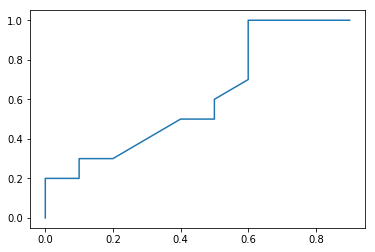

In [95]:
roc_x = []
roc_y = []
min_score = min(score)
max_score = max(score)
thr = np.linspace(min_score, max_score, 50)
FP=0
TP=0
N = sum(y) # 1 
P = len(y) - N # 0

for (_, T) in enumerate(thr):
    for i in range(0, len(score)):
        if (score[i] > T):
            if (y[i]==1):
                TP = TP + 1
            if (y[i]==0):
                FP = FP + 1
    roc_x.append(FP/float(N))
    roc_y.append(TP/float(P))
    FP=0
    TP=0

plt.plot(roc_x, roc_y)
plt.show()

In [328]:
thr

array([ 0.1       ,  0.14210526,  0.18421053,  0.22631579,  0.26842105,
        0.31052632,  0.35263158,  0.39473684,  0.43684211,  0.47894737,
        0.52105263,  0.56315789,  0.60526316,  0.64736842,  0.68947368,
        0.73157895,  0.77368421,  0.81578947,  0.85789474,  0.9       ])

In [46]:
arr1 = [1,2,3]
arr2 = [4,5,6]
np.vstack([arr1, arr2])

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
np.zeros((1,10)).shape

(1, 10)

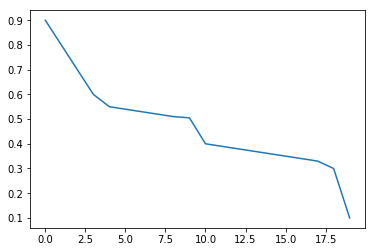

In [54]:
plt.plot(score)

In [81]:

import random; 
a = list(range(len(score)))
random.shuffle(a)
a, score[a]

([1, 14, 2, 13, 10, 7, 19, 9, 11, 6, 15, 4, 5, 18, 17, 12, 0, 16, 3, 8],
 array([0.8  , 0.36 , 0.7  , 0.37 , 0.4  , 0.52 , 0.1  , 0.505, 0.39 ,
        0.53 , 0.35 , 0.55 , 0.54 , 0.3  , 0.33 , 0.38 , 0.9  , 0.34 ,
        0.6  , 0.51 ]))

In [82]:
score = score[a]

In [85]:
score

array([0.8  , 0.36 , 0.7  , 0.37 , 0.4  , 0.52 , 0.1  , 0.505, 0.39 ,
       0.53 , 0.35 , 0.55 , 0.54 , 0.3  , 0.33 , 0.38 , 0.9  , 0.34 ,
       0.6  , 0.51 ])

In [94]:
np.linspace(min_score, max_score, 20)

array([0.1       , 0.14210526, 0.18421053, 0.22631579, 0.26842105,
       0.31052632, 0.35263158, 0.39473684, 0.43684211, 0.47894737,
       0.52105263, 0.56315789, 0.60526316, 0.64736842, 0.68947368,
       0.73157895, 0.77368421, 0.81578947, 0.85789474, 0.9       ])

In [87]:
len(score)

20